### [ scatter(산점도) Plot 살펴보기 ]
- 용도 : 2개 이상의 컬럼들의 관계 정도를 시각화하는 그래프
- corr()

In [1]:
import pandas as pd
import numpy as np

In [2]:
def histogram_intersection(a, b): #상관계수를 뽑아내는 함수.
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats']) #리스트 안에 튜플.


In [3]:
df.corr(method=histogram_intersection)
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [4]:
df.corr()

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [5]:
df=pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [6]:
df.corr(numeric_only=True, min_periods=2)

,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


(2) 데이터준비 <hr>

In [7]:
file = './DATA/auto-mpg.csv'

(3) 데이터저장 <hr>  => CSV ----> DataFrame

-컬럼별 정보.
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [8]:
mpgDF=pd.read_csv(file, 
                  sep='\s+', 
                  names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])

In [9]:
mpgDF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


(4) 데이터 정보 확인

- 전체 데이터 간략 정보 확인: info()

In [10]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터의 값의 종류 즉 고유값 확인. => unique(), nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입.

In [11]:
for col in mpgDF.columns:
    print(f'[{col}]=====================================================================')
    print(mpgDF[col].nunique(), mpgDF[col].unique(), sep = '\n', end='\n\n')

[mpg]=====================================================================
129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[cylinders]=====================================================================
5
[8 4 6 3 5]

[displacement]=====================================================================
82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113

In [12]:
#dropna 파라미터 설정으로 컬럼의 결측치 데이터 수까지 확인 가능.
mpgDF['origin'].nunique(dropna=False), mpgDF['origin'].unique()

(3, array([1, 3, 2], dtype=int64))

(5) 데이터 전처리 <hr>
- 결측치 체크 => 결측치가 반드시 NaN이 아닐 수 있다 (?등의 깨진 문자)
- 중복값 체크
- 이상치 체크 => 컬럼의 범위를 벗어난 값 혹은 잘못 입력된 값.
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

(5-1) 결측치 체크 및 처리 ==> 이상한 값 즉 이상치 NaN으로 변환 후 처리.

In [13]:
mpgDF.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [14]:
mpgDF.horsepower.nunique()

94

In [15]:
mpgDF.horsepower.value_counts()['?'] #mpgDF.horsepower의 값에 ?가 몇개 있는지 세기

6

In [16]:
mpgDF['horsepower'].replace('?', np.nan, inplace = True) #?를 NaN으로 변환.

In [17]:
mpgDF.isnull().sum() #NaN의 숫자 세기..

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [18]:
mpgDF.dropna(inplace=True)

In [19]:
mpgDF.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

(5-2) 데이터표준화 => horsepower의 자료형 실제 자료형과 일치

In [20]:
mpgDF.horsepower=mpgDF.horsepower.astype('float32') #inplace가 없어서 변수에 다시 저장해줘야함.

In [21]:
mpgDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

(5-2) 데이터표준화 => 연속형 즉 수치 자료형 -----> 범주형 자료형 변환
- 46~230 범위 실수 수치값 ===> 저출력 / 중출력 / 고출력

In [22]:
mpgDF.horsepower.describe()

count    392.000000
mean     104.469391
std       38.491138
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [23]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, include_lowest=True) 


[(0.993, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.993, 3.0]]
Categories (3, interval[float64, right]): [(0.993, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [24]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels = ['신생아', '영아', '유아'])

['신생아', '유아', '영아', '영아', '유아', '신생아']
Categories (3, object): ['신생아' < '영아' < '유아']

In [25]:
out, ret=pd.cut(mpgDF.horsepower, bins =3, labels=['저마력', '중마력', '고마력'], retbins = True)

In [26]:
mpgDF['horsepower']=out
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

In [27]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [28]:
pd.get_dummies(s, dtype="int32")

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


(5-3) 데이터 표준화 => (범주형 ==> 연속형/수치화 변환) : One-Hot-Encoding 방식

In [29]:
#pandas.get_dummies() 함수
#mpgDF에 origin 컬럼을 변환 ==> 1,2, 3 범주형.

In [30]:
pd.get_dummies(mpgDF.origin, dtype = 'int32')

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [31]:
#pandas.get_dummies() 함수
#mpgDF에 origin 컬럼을 변환 ==> 'USA', 'EU', "JPN" 변환.

In [32]:
mpgDF['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace=True)

In [33]:
mpgDF['origin']=mpgDF['origin'].astype('category')

In [34]:
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

(6) 데이터 분석 <hr>
(6-1) 연비 mpg 컬럼과 관계가 가장 높은 컬럼.

In [35]:
#상관계수 수치화 확인
corrDF = mpgDF.corr(numeric_only = True)
corrDF.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year'],
      dtype='object')

In [36]:
mpgDF.corr(numeric_only = True)

,mpg,cylinders,displacement,weight,acceleration,model year
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000


In [37]:
corrDF['mpg'][1:].sort_value()

AttributeError: 'Series' object has no attribute 'sort_value'

In [38]:
round(corrDF['mpg']['weight'], 2)

-0.83

In [39]:
###시각화로 연비 mpg 컬럼의 관계 확인 -------------------------------------------------
import matplotlib.pyplot as plt

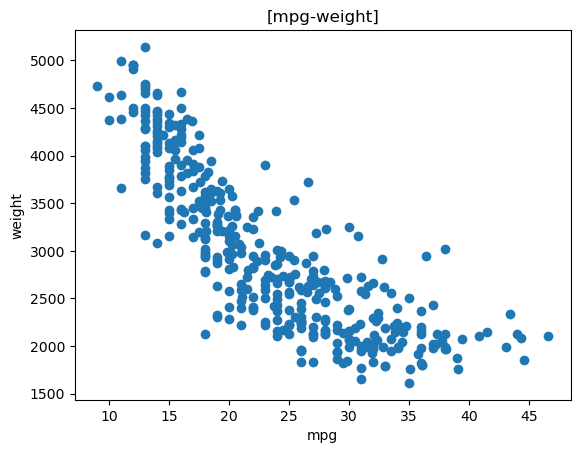

In [40]:
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('[mpg-weight]')
plt.show()

In [41]:
def printscatter(col1, col2):
    '''
    parameters:
    xol1, xol2 : column name 
    sr1, sr2 :Seiries object
    '''
plt.scatter(mpgDF[col1], mpgDF[col2])
plt.xlabel('col1')
plt.ylabel('col2')
plt.title(f'[{col1}-{col2}]')
plt.show()




NameError: name 'col1' is not defined

(6-2) 자동차 제조사의 데이터 비율

In [43]:
originSR = mpgDF['origin'].value_count()
originSR.index, orignSR.values

AttributeError: 'Series' object has no attribute 'value_count'

In [44]:
plt.bar(orignSR.index, orignSR.values)

NameError: name 'orignSR' is not defined